In [ ]:
%%time
zip_path = '/content/images.zip'
!cp “{zip_path}” .
!unzip -q images.zip
!rm images.zip

cp: cannot stat '“/content/images.zip”': No such file or directory
unzip:  cannot find or open images.zip, images.zip.zip or images.zip.ZIP.
rm: cannot remove 'images.zip': No such file or directory
CPU times: user 15.5 ms, sys: 226 ms, total: 241 ms
Wall time: 762 ms


In [ ]:
import keras

In [ ]:
keras.backend.backend()

'tensorflow'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,LeakyReLU,GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np


import os

In [ ]:
# !unzip m.zip -d my_data

In [ ]:
num_classes= 7
img_rows,img_cols=48,48
batch_size=64

In [ ]:
train_data_dir='/content/images/train'
validation_data_dir=r'/content/images/validation'

In [ ]:
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [ ]:
#image augumentation
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=30,
                                 shear_range=0.3,
                                 zoom_range=0.3,
                                 width_shift_range=0.4,
                                 height_shift_range=0.4,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

In [ ]:
validation_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                 color_mode='grayscale',
                                                 target_size=(img_rows,img_cols),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 28821 images belonging to 7 classes.


In [ ]:
validation_generator=validation_datagen.flow_from_directory(validation_data_dir,
                                                 color_mode='grayscale',
                                                 target_size=(img_rows,img_cols),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 7066 images belonging to 7 classes.


In [ ]:
model=Sequential()
leaky_relu_alpha=0.1

In [ ]:
#Block 1

model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))


model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))


model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))




#Block-2

model.add(Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(256,(3,3),activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(1024,kernel_initializer='he_normal',activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_20 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


450/450 [==============================] - 23s 49ms/step - loss: 2.4778 - accuracy: 0.1778 - val_loss: 1.8666 - val_accuracy: 0.2544

Epoch 00001: val_loss improved from inf to 1.86657, saving model to weights_4.h5
Epoch 2/200
450/450 [==============================] - 22s 49ms/step - loss: 1.9155 - accuracy: 0.2243 - val_loss: 1.8233 - val_accuracy: 0.2523

Epoch 00002: val_loss improved from 1.86657 to 1.82334, saving model to weights_4.h5
Epoch 3/200
450/450 [==============================] - 22s 49ms/step - loss: 1.8267 - accuracy: 0.2383 - val_loss: 1.8218 - val_accuracy: 0.2584

Epoch 00003: val_loss improved from 1.82334 to 1.82179, saving model to weights_4.h5
Epoch 4/200
450/450 [==============================] - 22s 49ms/step - loss: 1.8013 - accuracy: 0.2578 - val_loss: 1.8144 - val_accuracy: 0.2589

Epoch 00004: val_loss improved from 1.82179 to 1.81443, saving model to weights_4.h5
Epoch 5/200
450/450 [==============================] - 22s 49ms/step - loss: 1.7870 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


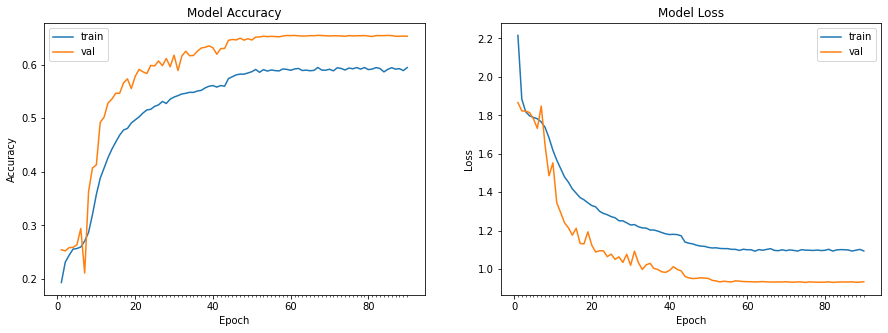

In [ ]:
checkpoint = ModelCheckpoint('weights_4.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

#stop the training is the validation loass is not reducing for 3 rounds(patience=3)
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=15,
                          verbose=1,
                          restore_best_weights=True
                          )

#reduce the learing rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=4,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 28821
nb_validation_samples = 7066 
epochs=200

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)
plot_model_history(history)